In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt


In [137]:
import yfinance as yf

In [138]:
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2019-12-31'

In [139]:
df = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [140]:
df.reset_index(inplace=True)

In [114]:
data = df['Close'].values.reshape(-1, 1)

In [115]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [116]:
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]


In [117]:
def create_sequences(data, sequence_length):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [118]:
sequence_length = 100  # Adjust the sequence length as needed
x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [119]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [120]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

# Make predictions on the test set
y_pred = model.predict(x_test)


Epoch 1/10
26/26 [==============================] - 13s 139ms/step - loss: 0.0055
Epoch 2/10
26/26 [==============================] - 4s 167ms/step - loss: 4.7474e-04
Epoch 3/10
26/26 [==============================] - 4s 139ms/step - loss: 1.7414e-04
Epoch 4/10
26/26 [==============================] - 4s 163ms/step - loss: 1.5493e-04
Epoch 5/10
26/26 [==============================] - 4s 132ms/step - loss: 1.5273e-04
Epoch 6/10
26/26 [==============================] - 4s 141ms/step - loss: 1.5369e-04
Epoch 7/10
26/26 [==============================] - 4s 141ms/step - loss: 1.4981e-04
Epoch 8/10
26/26 [==============================] - 3s 133ms/step - loss: 1.4955e-04
Epoch 9/10
26/26 [==============================] - 3s 132ms/step - loss: 1.4307e-04
Epoch 10/10
21/21 [==============================] - 4s 40ms/step


In [121]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [124]:
# ... (previous code)

from math import sqrt  # Import the sqrt function from the math library



In [125]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

NameError: name 'mean_squared_error' is not defined

In [127]:
from sklearn.metrics import mean_squared_error  # Import the mean_squared_error function


In [128]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.042633116537233


In [130]:
date_range = pd.date_range(start=df.index[train_size + sequence_length], periods=len(y_test))

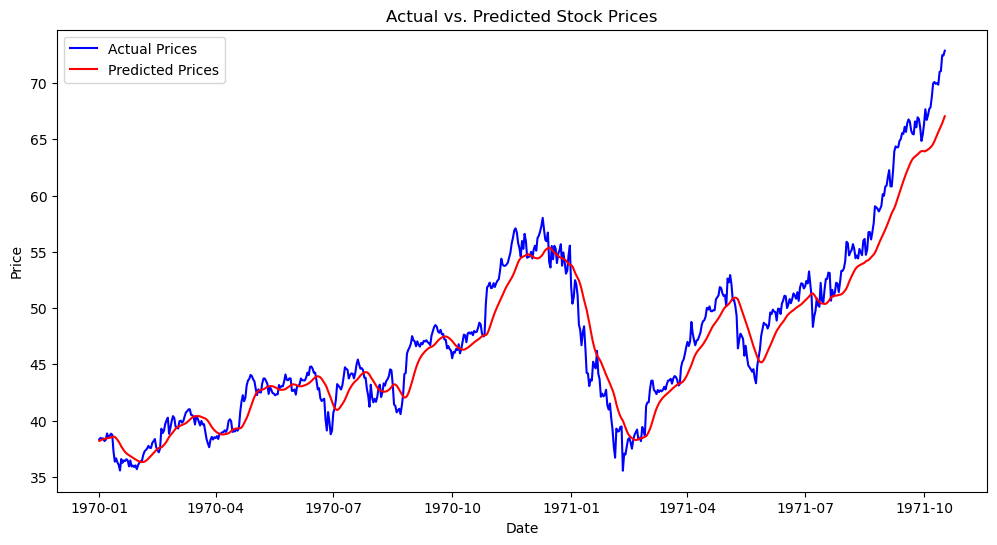

In [135]:
# Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(date_range, y_test, label='Actual Prices', color='blue')
plt.plot(date_range, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()